In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
sig_len_sec = 2
Fs = 20
T = 1/Fs
tt = np.arange(0, Fs * sig_len_sec) * T

In [3]:
f1 = 2
x1 = np.sin(2 * np.pi * f1 * tt)

In [4]:
y1 = np.zeros_like(x1)

for ii in range(1, len(tt)):
    y1[ii] = x1[ii] + x1[ii-1]

<IPython.core.display.Javascript object>


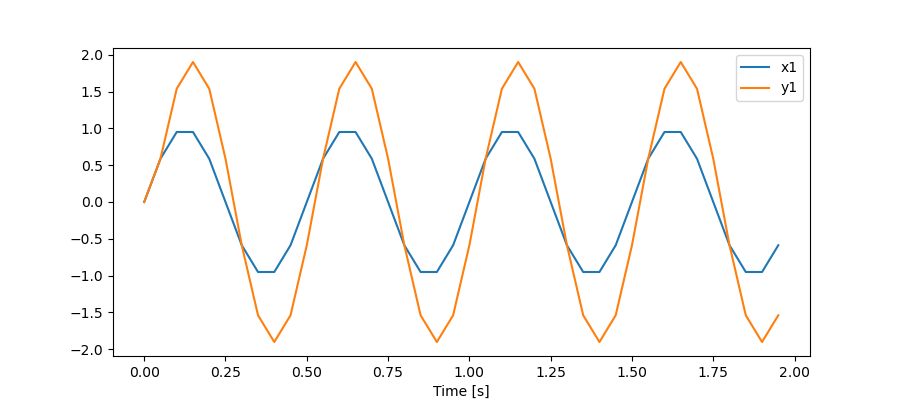

Text(0.5, 0, 'Time [s]')

In [5]:
f = plt.figure(figsize=(9, 4))
ax1 = f.add_subplot(111)

ax1.plot(tt, x1, label='x1')
ax1.plot(tt, y1, label='y1')
ax1.legend()

ax1.set_xlabel('Time [s]')

In [6]:
f2 = 4
x2 = np.sin(2 * np.pi * f2 * tt)

In [7]:
y2 = np.zeros_like(x2)

for ii in range(1, len(tt)):
    y2[ii] = x2[ii] + x2[ii-1]

<IPython.core.display.Javascript object>


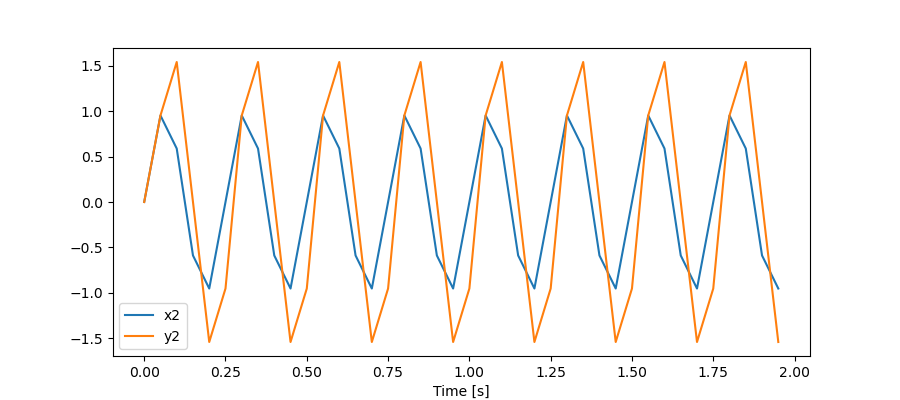

Text(0.5, 0, 'Time [s]')

In [8]:
f = plt.figure(figsize=(9, 4))
ax1 = f.add_subplot(111)

ax1.plot(tt, x2, label='x2')
ax1.plot(tt, y2, label='y2')
ax1.legend()

ax1.set_xlabel('Time [s]')

In [9]:
from scipy.signal import freqz

In [10]:
# Calculate the frequency response 'h' at the complex frequencies 'w'
# Note that 'w' is returned in the same units as 'Fs'
w, h = freqz([1, 1], [1], worN=8192)

w_hz = w * (Fs/(2*np.pi)) # 'convert 'w' from radians to Hz
h_db = 20 * np.log10(np.abs(h)) # convert 'h' from complex magitude to dB
angles = np.unwrap(np.angle(h)) * (180/np.pi)

<IPython.core.display.Javascript object>


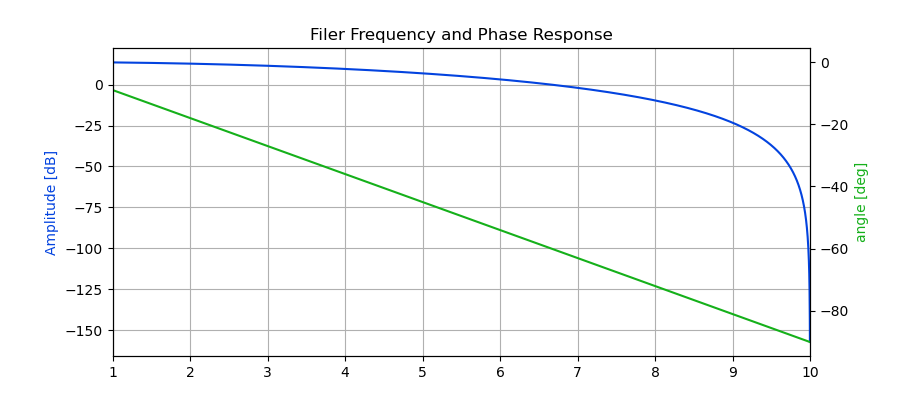

Text(0, 0.5, 'angle [deg]')

In [11]:
f = plt.figure(figsize=(9, 4))
ax1 = f.add_subplot(111)

ax1.plot(w_hz, 20*np.log(np.abs(h)), color='xkcd:blue')

# ax1.set_xscale('log')
ax1.set_xlim([1, Fs/2])
ax1.grid(which='both', axis='both')
ax1.set_ylabel('Amplitude [dB]', color='xkcd:blue')
ax1.set_title('Filer Frequency and Phase Response')

ax2 = ax1.twinx()
ax2.plot(w_hz, angles, color='xkcd:green')
ax2.set_ylabel('angle [deg]', color='xkcd:green')